In [ ]:
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functions import *
from SAEVs_calculation import *

## Data

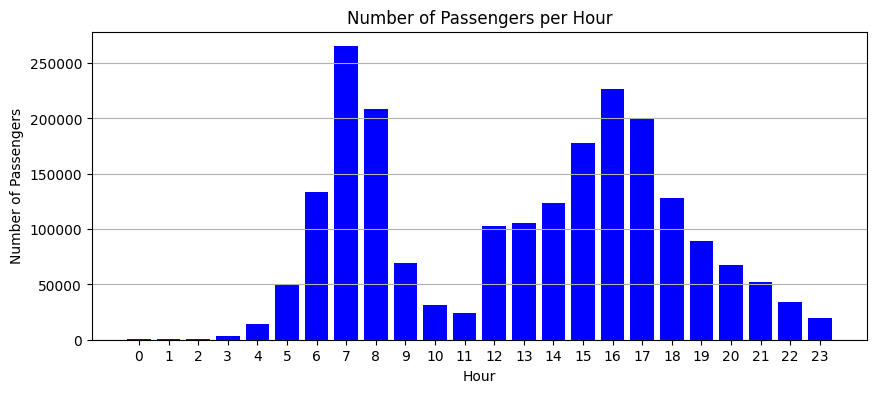

In [ ]:
coordinates = coordinates(plot=False, num_entries=None)
distance_matrix = shortest_path(num_entries=None)
passengers= passenger_demand(num_entries=None)
data = pd.read_excel('inputs.xlsx')

In [5]:
commutes_per_hour = []

for hour in range(24):
    # Sum all non-zero entries in the array for the current hour
    number_passengers = np.sum(passengers[:, :, hour])
    commutes_per_hour.append(number_passengers)
commutes_per_hour

df = pd.DataFrame(commutes_per_hour)


In [6]:
# Step 1: Divide each entry by 4
divided_values = df[0] / 4

# Step 2: Repeat each divided number four times
repeated_values = divided_values.repeat(4).reset_index(drop=True)

# Step 3: Create a new dataframe with the resulting entries
new_df = pd.DataFrame({'values': repeated_values})

print(new_df)


    values
0     50.5
1     50.5
2     50.5
3     50.5
4    112.5
..     ...
91  8475.0
92  4897.0
93  4897.0
94  4897.0
95  4897.0

[96 rows x 1 columns]


In [7]:
# determining the name of the file
file_name = 'od_demand.xlsx'

# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [8]:
num_nodes = len(coordinates['GeoUID'])
num_vehicles = 20
num_timesteps = 24
epsilon = 10
battery, pi_plus, pi_minus, pi_out, alpha, E_req, gamma_max, gamma_min, gamma_0, tau, xi, rho_plus, rho_minus, rho_out, eta, R_bat, N_Cy, lambda_DoD = create_parameters(distance_matrix, num_vehicles, num_nodes, num_timesteps, print_values=True)

Battery capacities (B): [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Price to buy energy (pi_plus): [0.0439696  0.04974355 0.0496965  0.02115897 0.02047737 0.03297849
 0.04533973 0.04580431 0.02349416 0.03413836 0.03321829 0.04268549
 0.02300278 0.0403138  0.04976023 0.03589435 0.03261101 0.03941065
 0.03782871 0.04836257 0.03060596 0.04293521 0.04924015 0.03808375]
Price to sell energy (pi_minus): [0.01384992 0.01172137 0.01205092 0.02490954 0.02564261 0.02176854
 0.02777982 0.01408988 0.02166543 0.01252713 0.01807043 0.01606441
 0.02906945 0.01839071 0.02578621 0.02625385 0.02000206 0.01677954
 0.01917743 0.02719954 0.0276939  0.01260376 0.02251389 0.0200577 ]
Price to sell energy (outage) (pi_out): [0.0313365  0.03147304 0.02242346 0.03062288 0.01691603 0.01716827
 0.02558495 0.02075799 0.01941209 0.02050154 0.02650195 0.01586553
 0.02573325 0.03122542 0.01647612 0.01625616 0.03290415 0.03195534
 0.03460656 0.03098276 0.0201487

In [ ]:
model = solve_opt(data,pass_min=2000, mult_2=0,tee=True)

# Results

In [ ]:
D_passenger = (data['Total demand'][:96]).tolist()
O_energy = (data['Outage'][:96]).tolist()
plot_variables(model, D_passenger, O_energy)